In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.6.0'

In [3]:
# ---------------------------------- Import and load dataset ----------------------------------
mnist = tf.keras.datasets.mnist
np.random.seed(5)
# ---------------------------------------------------------------------------------------------
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

In [4]:
print(X_train_full.shape, y_train_full.shape)

(60000, 28, 28) (60000,)


In [5]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


## Creating validation datasets from full training dataset.

In [6]:
# -------- Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range --------
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# ------------------------------- scale the test set as well -------------------------------
X_test = X_test / 255. 

In [7]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(55000, 28, 28) (5000, 28, 28) (55000,) (5000,)


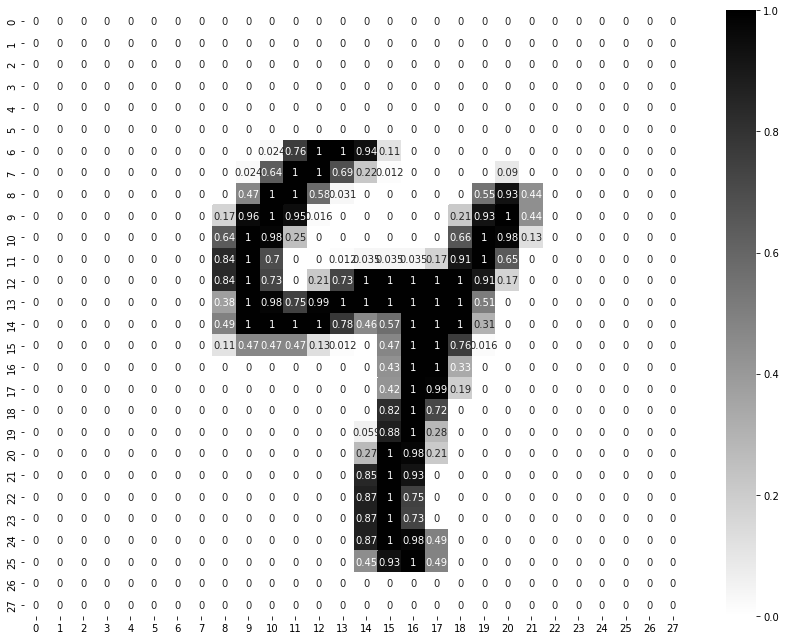

In [8]:
# -------------------------- lets view the first data point of X_train --------------------------
plt.figure(figsize = (12, 9))
sns.heatmap(X_train[2], annot = True, cmap = 'binary')
plt.tight_layout();

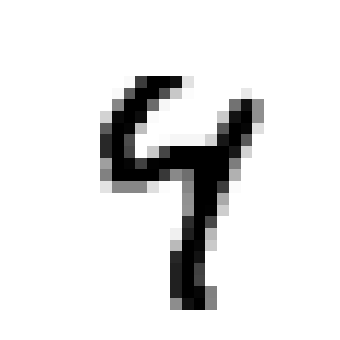

In [9]:
plt.figure(figsize = (7, 6))
plt.imshow(X_train[2], cmap = 'binary')
plt.axis('off')
plt.show()

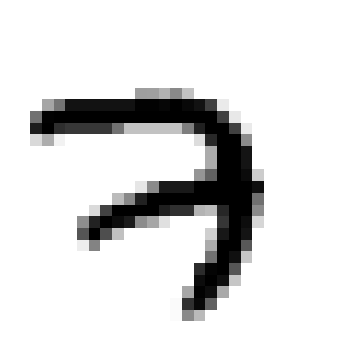

In [10]:
plt.figure(figsize = (7, 6))
plt.imshow(X_train[0], cmap = 'binary')
plt.axis('off')
plt.show()

## Build the model :

In [11]:
from keras.layers import Dropout

In [12]:
model = tf.keras.models.Sequential()

# -------------------- Input Layer -------------------------
model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))

# -------------------- Hidden layer : First --------------------
model.add(tf.keras.layers.Dense(784, activation = 'relu'))
model.add(Dropout(0.2))

# ------------------- Hidden layer : Second --------------------
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

# -------------------- Output layer ------------------------
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
# ----------------------------------------------------------
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,022,490
Trainable params: 1,022,490
Non-trainable params: 0
______________________________________________

In [13]:
# firsLayer * secondLayer + bias
print(784*784 + 784, 784*512+512, 512*10+10)

615440 401920 5130


In [14]:
%%time
loss_function = 'sparse_categorical_crossentropy'       # use => tf.losses.sparse_categorical_crossentropy
optimizer = 'SGD'                                       # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
metrics = ['accuracy']

model.compile(loss = loss_function, optimizer = optimizer, metrics = metrics)

# ----------------------------------- fit the model -----------------------------------
model.fit(X_train, y_train, epochs = 2)

Epoch 1/2
1719/1719 [==============================] - 20s 11ms/step - loss: 0.6279 - accuracy: 0.8290
Epoch 2/2
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3149 - accuracy: 0.9078
CPU times: user 58.1 s, sys: 2.94 s, total: 1min 1s
Wall time: 39 s


In [15]:
model.fit(X_train, y_train, epochs = 2, verbose = 1, validation_data = (X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2542 - accuracy: 0.9262 - val_loss: 0.1905 - val_accuracy: 0.9476
Epoch 2/2
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2152 - accuracy: 0.9376 - val_loss: 0.1662 - val_accuracy: 0.9532


In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
# model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(200, activation = 'relu'))
# model.add(Dropout(.2))
model.add(tf.keras.layers.Dense(100, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
Total params: 315,800
Trainable params: 315,800
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss = loss_function, optimizer = optimizer, metrics = metrics);
# ----------------------------------------------------------------------------------------
model.fit(X_train, y_train, epochs = 2, verbose = 1, validation_data = (X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6951 - accuracy: 0.8291 - val_loss: 0.3255 - val_accuracy: 0.9064
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3087 - accuracy: 0.9119 - val_loss: 0.2587 - val_accuracy: 0.9290


In [18]:
model.fit(X_train, y_train,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2567 - accuracy: 0.9266 - val_loss: 0.2325 - val_accuracy: 0.9360
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2211 - accuracy: 0.9367 - val_loss: 0.2059 - val_accuracy: 0.9406
